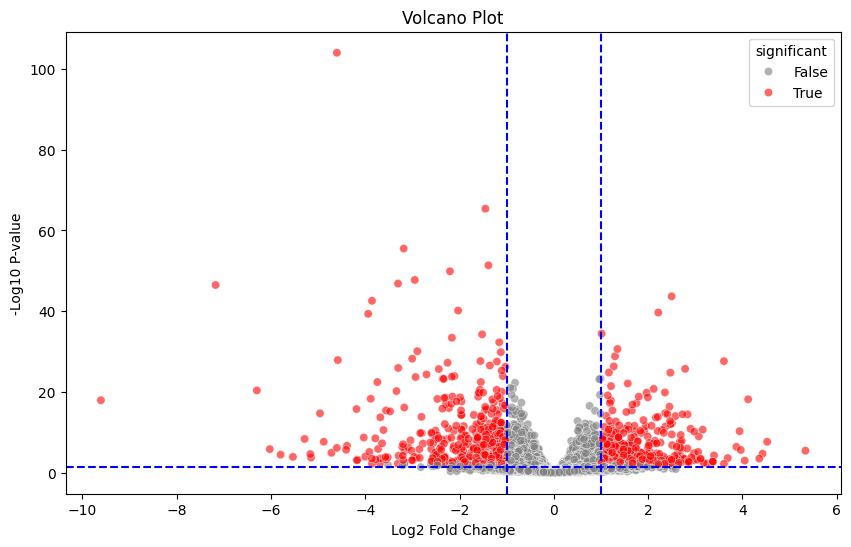

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load DESeq2 results
df = pd.read_csv("deseq2_results.csv")

# Drop rows with missing p-values
df = df.dropna(subset=["padj", "pvalue"])

# Add a 'significant' flag
df["significant"] = (df["padj"] < 0.05) & (abs(df["log2FoldChange"]) > 1)

# Volcano Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="log2FoldChange",
    y=df["pvalue"].apply(lambda p: -np.log10(p) if p > 0 else 0),
    hue="significant",
    palette={True: "red", False: "grey"},
    alpha=0.6
)
plt.title("Volcano Plot")
plt.xlabel("Log2 Fold Change")
plt.ylabel("-Log10 P-value")
plt.axhline(y=1.3, color='blue', linestyle='--')  # ~p=0.05
plt.axvline(x=1, color='blue', linestyle='--')
plt.axvline(x=-1, color='blue', linestyle='--')
plt.show()


In [3]:
plt.savefig("plots/volcano_plot.png", dpi=300, bbox_inches="tight")


<Figure size 640x480 with 0 Axes>